In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.stats as st
import sympy as s

# E1

## Monte Carlo Integration


In [2]:
def monte_carlo_integrator(a,b,N,f):
    x = np.array([np.random.uniform(a, b) for _ in range(N)])
    fx = f(x)
    average_fx = sum(fx)/N
    average_fx_2 = sum(fx**2)/N
    integral = (b-a)*average_fx
    error = (b-a) *np.sqrt((average_fx_2-average_fx**2)/(N-1))
    return (b-a)*average_fx, error

In [3]:
def pol(x): # function to be integrated
    return x**4

In [4]:
monte_carlo_integrator(0,1,1000,pol)

(0.2172902587646909, 0.008844962261147643)

In [5]:
analytical_pol = 1/5*1**5 # analytical solution

In [6]:
a = analytical_pol
b = monte_carlo_integrator(0,1,1000,pol)

In [7]:
print("results: I = %.4f,  sigma = %.4f" %  (b[0],b[1]))

results: I = 0.2008,  sigma = 0.0085


In [8]:
print("(I_analtical-I_N/sigma_N)= %.4f" % ((a-b[0])/b[1]))

(I_analtical-I_N/sigma_N)= -0.0968


In [ ]:
## b)

In [9]:
integral_ensemble = np.array([monte_carlo_integrator(0,1,1000,pol)[0] for i\
                     in range(1000)])

Freedman–Diaconis number of bins: 23


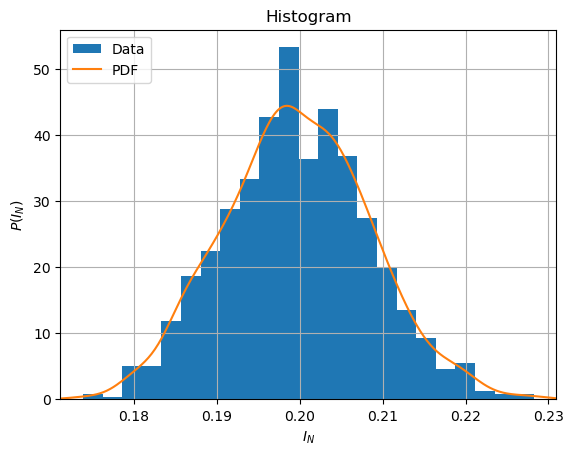

In [10]:
### wrong results please ignore

x = integral_ensemble
%matplotlib inline
q25, q75 = np.percentile(x, [25, 75])
bin_width = 2 * (q75 - q25) * len(x) ** (-1/3)
bins = round((x.max() - x.min()) / bin_width)
print("Freedman–Diaconis number of bins:", bins)
plt.hist(x, density=True, bins=bins, label="Data")
mn, mx = plt.xlim()
plt.xlim(mn, mx)
kde_xs = np.linspace(mn, mx, 300)
kde = st.gaussian_kde(x)
plt.plot(kde_xs, kde.pdf(kde_xs), label="PDF")
plt.legend(loc="upper left")

plt.title("Histogram");

plt.xlabel(r'$I_N$')
plt.ylabel(r'$P(I_N)$')
plt.grid()

In [11]:
#https://stackoverflow.com/questions/20011122/fitting-a-normal-distribution-to-1d-data

0.19967950355271355 0.008759762765055376


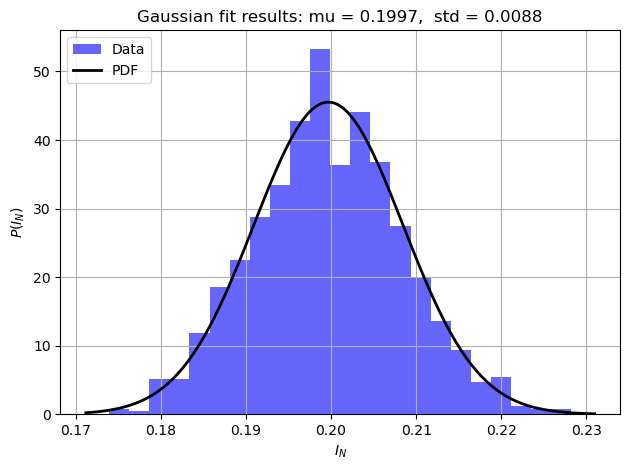

In [15]:
from scipy.stats import norm

mu, std = norm.fit(integral_ensemble)

# Plot the histogram.
plt.hist(integral_ensemble, bins=bins, density=True, alpha=0.6, color='b', label="Data")

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label="PDF")
title = "Gaussian fit results: mu = %.4f,  std = %.4f" % (mu, std)
plt.title(title)
plt.grid()
plt.xlabel(r'$I_N$')
plt.ylabel(r'$P(I_N)$')
plt.legend(loc="upper left")
print(mu, std)
plt.tight_layout()
plt.savefig("1b.pdf")

In [20]:
### c

In [16]:
def random_with_dist(t,a,b):
    g = t[0]
    g_inv = t[1]
    number = np.random.uniform(0, 1)
    result = g_inv(g(a) + number*(g(b)-g(a)))
    return result

In [17]:
def func_wrapper(t,a,b):
    x = s.symbols('x')
    y = s.symbols('y')
    z = s.symbols('z')
    g = t(x)
    g_int = s.integrate(g,(x,a,b))
    g = s.integrate(g,(x,a,z))/g_int
    g_inv = s.solve(y - g, z)
    if len(g_inv)>1:
        if a<0:
            g_inv=abs(g_inv[0])
        else:
            g_inv=abs(g_inv[1])
    else:
        g_inv=abs(g_inv[0])
    return s.lambdify(z, g), s.lambdify(y, g_inv), g_int

In [18]:
### test

In [19]:
def t(x):
    return x**2


In [20]:
a,b = 0,1
func1 = func_wrapper(t,a,b)

In [21]:

test = [random_with_dist(func1,a,b) for _ in range(100000)]

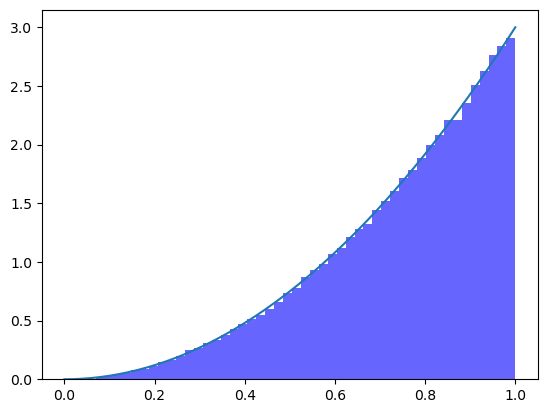

In [22]:
plt.hist(test, bins=50, density=True, alpha=0.6, color='b', label="Data")
plt.plot(np.linspace(a,b),t(np.linspace(a,b))/func1[2])


In [23]:
def importance_sampling_integrator(a,b,N,f,g):
    g_dist = func_wrapper(g,a,b)
    x = np.array([random_with_dist(g_dist,a,b) for _ in range(N)])
    fx = f(x)
    gx = g(x)
    average_fx = sum(fx/gx)/N
    average_fx_2 = sum((fx/gx)**2)/N
    integral = (b-a)*average_fx
    error = (b-a) *np.sqrt((average_fx_2-average_fx**2)/(N-1))
    return (b-a)*average_fx, error

In [33]:
funcs = [lambda x:2*x,lambda x:3*x**2,lambda x:4*x**3,lambda x:5*x**4]
integ_samples = []
for g in funcs:
    integ_samples.append([importance_sampling_integrator(0,1,1000,pol,g)[0] for _ in range(1000)])
    
    

0.20025374376943722 0.004815217783649724


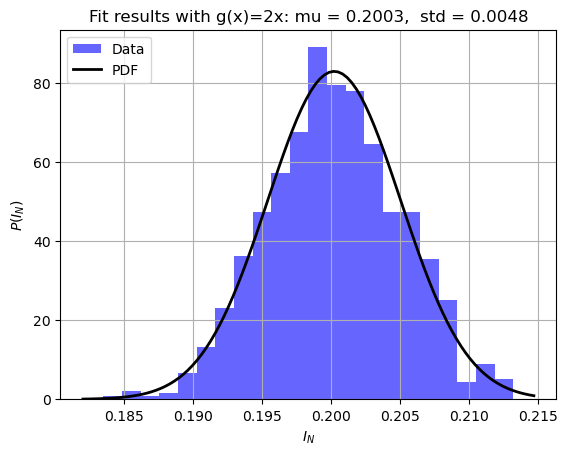

In [34]:
from scipy.stats import norm
s = integ_samples[0]
mu, std = norm.fit(s)

# Plot the histogram.
plt.hist(s, bins=bins, density=True, alpha=0.6, color='b', label="Data")

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label="PDF")
title = "Fit results with g(x)=2x: mu = %.4f,  std = %.4f" % (mu, std)
plt.title(title)
plt.grid()
plt.xlabel(r'$I_N$')
plt.ylabel(r'$P(I_N)$')
plt.legend(loc="upper left")
print(mu, std)

0.20006612010185115 0.002766643821160398


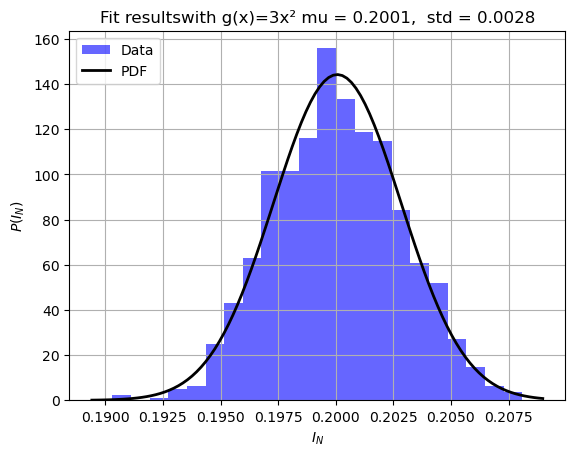

In [35]:
from scipy.stats import norm
s = integ_samples[1]
mu, std = norm.fit(s)
print(mu, std)
# Plot the histogram.
plt.hist(s, bins=bins, density=True, alpha=0.6, color='b', label="Data")

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label="PDF")
title = "Fit results with g(x)=3x² mu = %.4f,  std = %.4f" % (mu, std)
plt.title(title)
plt.grid()
plt.xlabel(r'$I_N$')
plt.ylabel(r'$P(I_N)$')
plt.legend(loc="upper left")

0.19993249024494936 0.0013491537524972835


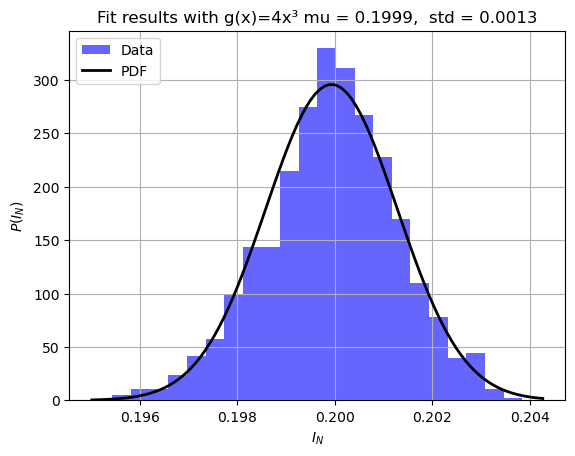

In [36]:
from scipy.stats import norm
s = integ_samples[2]
mu, std = norm.fit(s)

# Plot the histogram.
plt.hist(s, bins=bins, density=True, alpha=0.6, color='b', label="Data")

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label="PDF")
title = "Fit results with g(x)=4x³ mu = %.4f,  std = %.4f" % (mu, std)
plt.title(title)
plt.grid()
plt.xlabel(r'$I_N$')
plt.ylabel(r'$P(I_N)$')
plt.legend(loc="upper left")
print(mu, std)

0.1999999999999971 8.326672684688674e-17


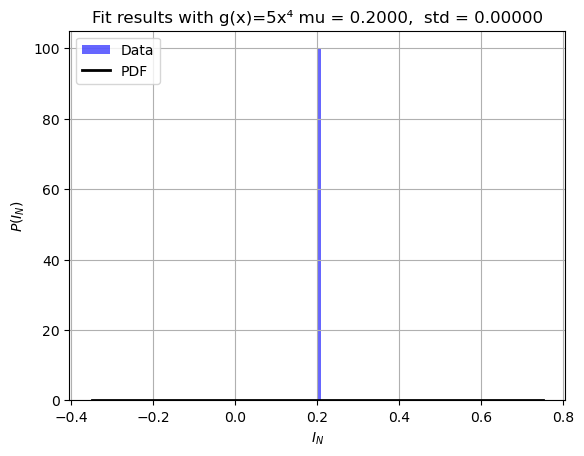

In [38]:
from scipy.stats import norm
s = integ_samples[3]
mu, std = norm.fit(s)

# Plot the histogram.
plt.hist(s, bins=100, density=True, alpha=0.6, color='b', label="Data")

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label="PDF")
title = "Fit results with g(x)=5x⁴ mu = %.4f,  std = %.5f" % (mu, std)
plt.title(title)
plt.grid()
plt.xlabel(r'$I_N$')
plt.ylabel(r'$P(I_N)$')
plt.legend(loc="upper left")
print(mu, std)

In [27]:
funcs = [lambda x:2*x,lambda x:3*x**2,lambda x:4*x**3,lambda x:5*x**4]
N = [i for i in range(100,1000)]
sigma_ensembles = []
for g in funcs:
    sigma_ensembles.append([importance_sampling_integrator(0,1,n,pol,g)[1] for n in N])


/tmp/ipykernel_75/3346808109.py:9: RuntimeWarning: invalid value encountered in sqrt
  error = (b-a) *np.sqrt((average_fx_2-average_fx**2)/(N-1))


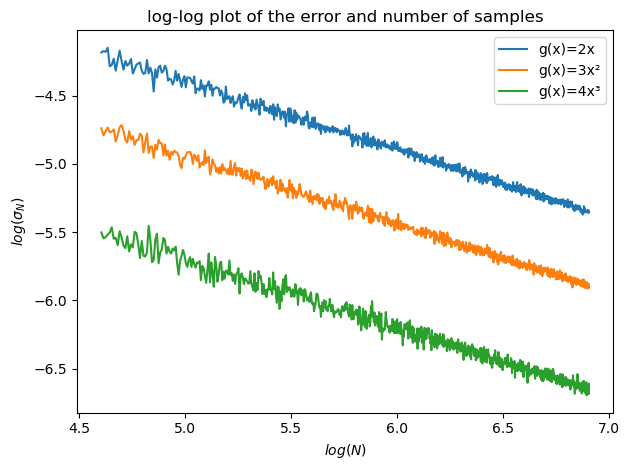

In [37]:

labels = ["g(x)=2x","g(x)=3x²","g(x)=4x³","g(x)=5x⁴"]


for i in range(len(sigma_ensembles)-1):
    plt.plot(np.log(np.array(N)),np.log(np.array(sigma_ensembles[i])), label=labels[i])
plt.xlabel(r'$log(N)$')
plt.ylabel(r'$log(\sigma_N)$')
plt.title("log-log plot of the error and number of samples")
plt.legend()
plt.tight_layout()
plt.savefig("loglog.pdf")

# E2

In [29]:
def random_walker_2D(N,r=False):
    coordinates = [(0,0)]
    for i in range(N):
        x_ = np.random.uniform(-1, 1)
        y_ = np.random.uniform(-1, 1)
        L = np.sqrt(x_**2+y_**2)
        x =x_/L
        y=y_/L
        coordinates.append((coordinates[-1][0]+x,coordinates[-1][1]+y))
    x1 = []
    y1 = []
    for (x,y) in coordinates:
        x1.append(x)
        y1.append(y)
    return x1,y1

def distance_from_origin(x,y):
    return np.sqrt((x[-1]-x[0])**2 + (y[-1]-y[0])**2)

def R_rms(x,y):
    dx = [x[i+1]-x[i] for i in range(len(x)-1)]
    dy = [y[i+1]-y[i] for i in range(len(y)-1)]
    R = np.sqrt(sum([dx[i]**2+dy[i]**2 for i in range(len(dx))]))
    return R

In [30]:
random_Walker1 = random_walker_2D(1000)
random_Walker2 = random_walker_2D(1000)
random_Walker3 = random_walker_2D(1000)


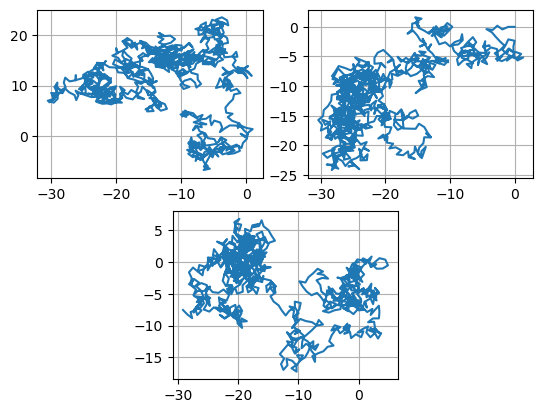

In [31]:
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(2, 4)
gs.update(wspace=0.5)
ax1 = plt.subplot(gs[0, :2], )
ax2 = plt.subplot(gs[0, 2:])
ax3 = plt.subplot(gs[1, 1:3])
ax1.plot(random_Walker1[0],random_Walker1[1],'-')
ax1.grid()
ax2.plot(random_Walker2[0],random_Walker2[1],'-')
ax2.grid()
ax3.plot(random_Walker3[0],random_Walker3[1],'-')
ax3.grid()




In [286]:
distance_from_origin(random_Walker1[0],random_Walker1[1])

55.630061488869366

In [280]:
## b)

In [6]:
distance_ensemble = []

for _ in range(1000):
    w = random_walker_2D(10000)
    distance_ensemble.append(distance_from_origin(w[0],w[1]))


In [4]:
N = [n for n in range(1000,10000)]
rms_ensemble = []
for n in range(1000,10000):
    w = random_walker_2D(n)
    rms_ensemble.append(R_rms(w[0],w[1]))

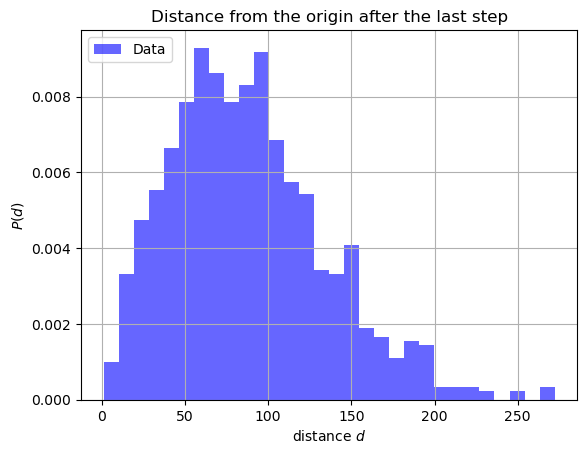

In [8]:
from scipy.stats import norm
#s = distance_ensemble
mu, std = norm.fit(distance_ensemble)

# Plot the histogram.
plt.hist(distance_ensemble, bins=30, density=True, alpha=0.6, color='b', label="Data")

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

plt.title("Distance from the origin after the last step")
plt.grid()
plt.xlabel(r'distance $d$')
plt.ylabel(r'$P(d)$')
plt.legend(loc="upper left")


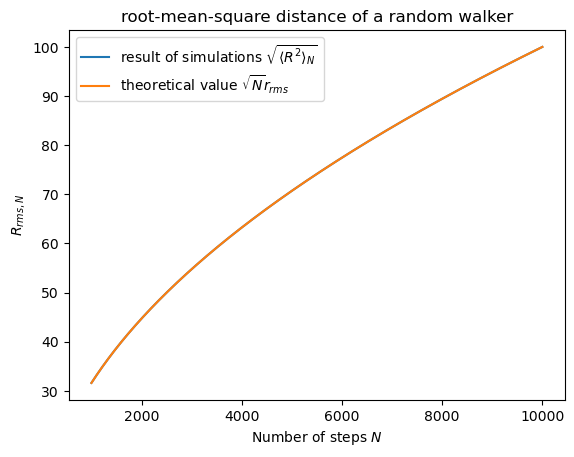

In [14]:
plt.plot(N, rms_ensemble, label="result of simulations $\\sqrt{\\langle R^2\\rangle_N}$")
plt.plot(N,np.sqrt(np.array(N)), label="theoretical value $\sqrt{N}r_{rms}$")
plt.xlabel(r'Number of steps $N$')
plt.ylabel(r'$R_{rms,N}$')
plt.title("root-mean-square distance of a random walker")
plt.legend()

In [58]:
## A4
#!pip install svgpath2mpl matplotlib
from svgpath2mpl import parse_path

ModuleNotFoundError: No module named 'svgpath2mpl'

In [60]:
def N(N_0, l):
    Nt = [N_0]
    time = [0]
    t=0
    N = N_0
    while N >0:
        dN=0
        for i in range(N):
            if np.random.uniform(0, 1)<l:
                dN+=1
        N=N-dN
        t+=1
        Nt.append(N)
        time.append(t)
    return np.array(time), np.array(Nt)

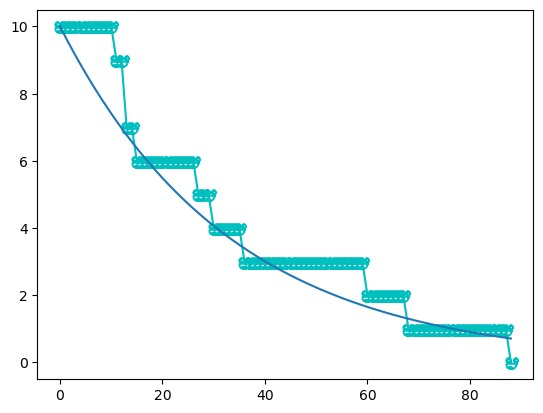

In [26]:
t,n = N(10, .03)
smiley = parse_path("""m 739.01202,391.98936 c 13,26 13,57 9,85 -6,27 -18,52 -35,68 -21,20 -50,23 -77,18 -15,-4 -28,-12 -39,-23 -18,-17 -30,-40 -36,-67 -4,-20 -4,-41 0,-60 l 6,-21 z m -302,-1 c 2,3 6,20 7,29 5,28 1,57 -11,83 -15,30 -41,52 -72,60 -29,7 -57,0 -82,-15 -26,-17 -45,-49 -50,-82 -2,-12 -2,-33 0,-45 1,-10 5,-26 8,-30 z M 487.15488,66.132209 c 121,21 194,115.000001 212,233.000001 l 0,8 25,1 1,18 -481,0 c -6,-13 -10,-27 -13,-41 -13,-94 38,-146 114,-193.000001 45,-23 93,-29 142,-26 z m -47,18 c -52,6 -98,28.000001 -138,62.000001 -28,25 -46,56 -51,87 -4,20 -1,57 5,70 l 423,1 c 2,-56 -39,-118 -74,-157 -31,-34 -72,-54.000001 -116,-63.000001 -11,-2 -38,-2 -49,0 z m 138,324.000001 c -5,6 -6,40 -2,58 3,16 4,16 10,10 14,-14 38,-14 52,0 15,18 12,41 -6,55 -3,3 -5,5 -5,6 1,4 22,8 34,7 42,-4 57.6,-40 66.2,-77 3,-17 1,-53 -4,-59 l -145.2,0 z m -331,-1 c -4,5 -5,34 -4,50 2,14 6,24 8,24 1,0 3,-2 6,-5 17,-17 47,-13 58,9 7,16 4,31 -8,43 -4,4 -7,8 -7,9 0,0 4,2 8,3 51,17 105,-20 115,-80 3,-15 0,-43 -3,-53 z m 61,-266 c 0,0 46,-40 105,-53.000001 66,-15 114,7 114,7 0,0 -14,76.000001 -93,95.000001 -76,18 -126,-49 -126,-49 z""")
smiley.vertices -= smiley.vertices.mean(axis=0)

plt.plot(t,n, marker=smiley,markersize=10, color='c')
tt =np.linspace(0,t[-1],1000)
plt.plot(tt,10*np.exp(-0.03*tt))



/tmp/ipykernel_75/2311391181.py:4: RuntimeWarning: divide by zero encountered in log
  plt.plot(t,np.log(np.array(n)), '.',label ="Simulated $N_0$="+str(i))


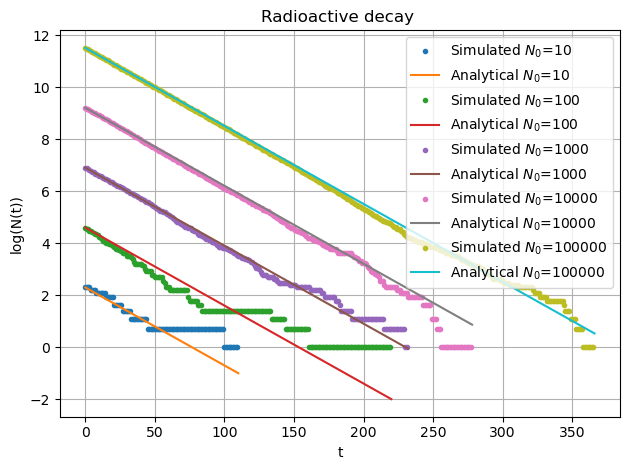

In [62]:
nn = [10,100,1000,10000,100000]
for i in nn:
    t, n = N(i,0.03)
    plt.plot(t,np.log(np.array(n)), '.',label ="Simulated $N_0$="+str(i))
    tt =np.linspace(0,t[-1],1000)
    plt.plot(tt,np.log(i*np.exp(-0.03*tt)),label ="Analytical $N_0$="+str(i))
plt.legend(loc=1, prop={'size': 6})
plt.xlabel(r't')
plt.ylabel(r'log(N(t))')
plt.title("Radioactive decay ")
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("Nt.pdf")

/tmp/ipykernel_75/3912427602.py:4: RuntimeWarning: divide by zero encountered in log
  plt.plot(t,np.log(np.array(n)), '.',label ="Simulated $N_0$="+str(i))


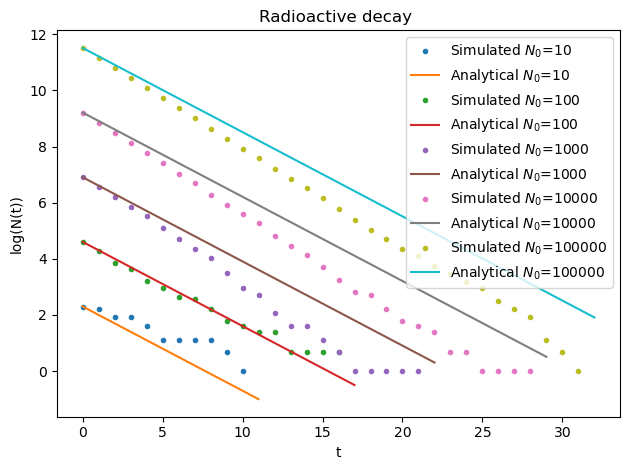

In [63]:
nn = [10,100,1000,10000,100000]
for i in nn:
    t, n = N(i,0.3)
    plt.plot(t,np.log(np.array(n)), '.',label ="Simulated $N_0$="+str(i))
    tt =np.linspace(0,t[-1],1000)
    plt.plot(tt,np.log(i*np.exp(-0.3*tt)),label ="Analytical $N_0$="+str(i))
plt.legend(loc=1, prop={'size': 6})
plt.grid()
plt.xlabel(r't')
plt.ylabel(r'log(N(t))')
plt.title("Radioactive decay ")
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("Ntt.pdf")

In [38]:
def self_avoiding_random_walker(n):
    grid = [[0 for x in range(31)] for y in range(31)]
    x, y = [16], [16]
    positions = set([(16,16)])  #positions is a set that stores all sites visited by the walk
    p =np.random.uniform(0,1)
    if p<0.7:
         grid[x[-1]-1][y[-1]-1]=1
    else:
        grid[x[-1]-1][y[-1]-1]=-1
    stuck = 0
    deltas = [(1,0), (0,1), (-1,0), (0,-1)]
    while True:
        deltas_feasible = []  #deltas_feasible stores the available directions 
        for dx, dy in deltas:
            if (x[-1] + dx, y[-1] + dy) not in positions \
                and x[-1] + dx >=1 and y[-1] + dy>=1 \
                and x[-1] + dx <=31 and y[-1] + dy<=31:   #checks if direction leads to a site not visited before
                deltas_feasible.append((dx,dy))
        if deltas_feasible:  #checks if there is a direction available
            dx, dy = deltas_feasible[np.random.randint(0,len(deltas_feasible))]  #choose a direction at random among available ones
            positions.add((x[-1] + dx, y[-1] + dy))
            x.append(x[-1] + dx)
            y.append(y[-1] + dy)
            p =np.random.uniform(0,1)
            if p<0.7:
                grid[x[-1]-1][y[-1]-1]=1
            else:
                grid[x[-1]-1][y[-1]-1]=-1
        else:  #in that case the walk is stuck
            stuck = 1
            #steps = i+1
            break  #terminate the walk prematurely
        steps = n+1
    ### energy
    deltas = [(1,0), (0,1)]#, (-1,0), (0,-1)]
    Energy = 0
    for i in range(31):
        for j in range(31):
            if(grid[i][j]==1):
                if i+1<31:
                    if(grid[i+1][j]==1):
                        Energy +=1
                if j+1<31:
                    if(grid[i][j+1]==1):
                        Energy +=1
    for i in range(len(x)-1):
        if (grid[x[i]-1][y[i]-1] == 1 and grid[x[i+1]-1][y[i+1]-1] == 1):
            Energy -=1 

    return x,y, grid, steps, Energy
    
        

In [55]:
from matplotlib.colors import ListedColormap
def show(y,x, grid, steps, energy):
    d=1/2
    nrows, ncols = 31,31
    row_labels = [i+1 for i in range(31)]
    col_labels = [i+1 for i in range(31)]
    cmap = ListedColormap([ 'cornflowerblue','whitesmoke','indianred'])
        #cax = ax.matshow(x,cmap=cmap)
        #plt.matshow(image, cmap=cmap)
    plt.figure(figsize=(11,11))
    plt.pcolor(grid, cmap=cmap, edgecolors='dimgrey', linewidth =.5)
    plt.plot(np.array(x)-d, np.array(y)-d, 'bo-', linewidth = 1, label= "Protein")#H-monomers
    plt.plot(16-d, 16-d, 'go', ms = 12, label = 'Start')
    plt.plot(x[-1]-d, y[-1]-d, 'ro', ms = 12, label = 'End')
        #plt.grid(which='both', axis='both', linestyle='-', color='k', linewidth=.1, ds = 'steps-mid')
    plt.xticks(range(ncols), col_labels)
    plt.yticks(range(nrows), row_labels)
    plt.title("energy %.1f" % (Energy))
    plt.legend()
        #plt.set_size_inches(18.5, 10.5)
    #plt.show() 

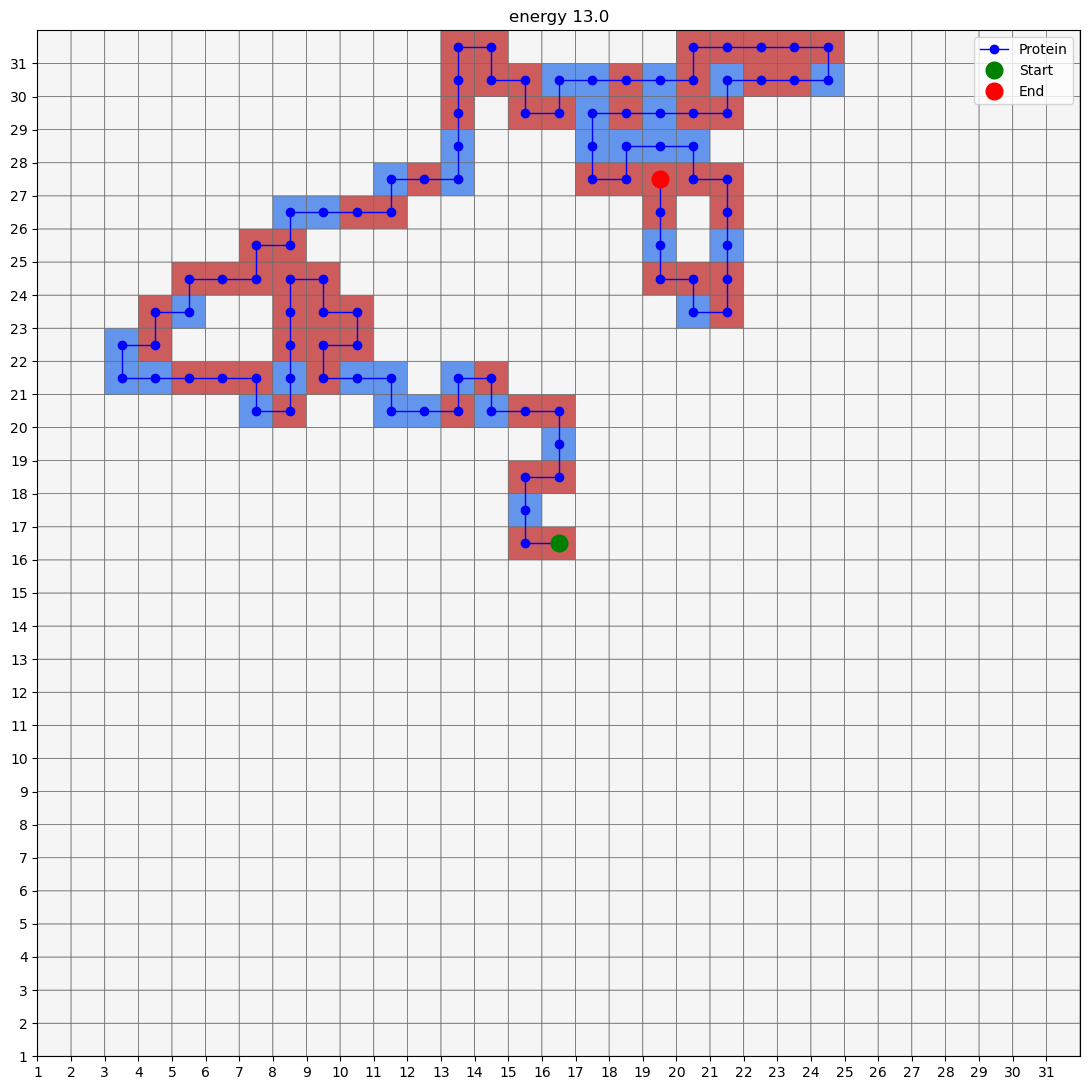

In [56]:
x,y, grid, steps, Energy = self_avoiding_random_walker(1)
show(x,y, grid, steps, Energy)
plt.tight_layout()
plt.savefig("rw.pdf")

In [378]:
self_avoiding_ensemble_E = []
self_avoiding_ensemble_L = []
for i in range(10000):
    x,y, grid, steps, Energy = self_avoiding_random_walker(1)
    self_avoiding_ensemble_E.append(Energy)
    self_avoiding_ensemble_L.append(len(x))
    if Energy<0:
        show(x,y, grid, steps, Energy)


In [379]:
print(min(self_avoiding_ensemble_E))

0


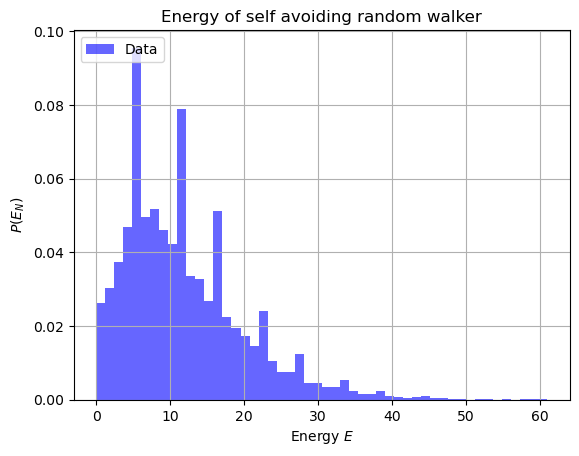

In [380]:
from scipy.stats import norm
s = self_avoiding_ensemble_E

# Plot the histogram.
plt.hist(s, bins=50, density=True, alpha=0.6, color='b', label="Data")


title = "Energy of self avoiding random walker"
plt.title(title)
plt.grid()
plt.xlabel(r'Energy $E$')
plt.ylabel(r'$P(E_N)$')
plt.legend(loc="upper left")


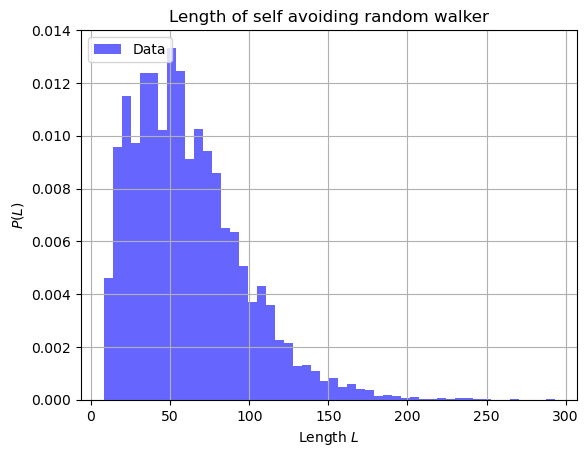

In [381]:
from scipy.stats import norm
s = self_avoiding_ensemble_L

# Plot the histogram.
plt.hist(s, bins=50, density=True, alpha=0.6, color='b', label="Data")


title = "Length of self avoiding random walker"
plt.title(title)
plt.grid()
plt.xlabel(r'Length $L$')
plt.ylabel(r'$P(L)$')
plt.legend(loc="upper left")

In [382]:
heatmap, xedges, yedges = np.histogram2d(self_avoiding_ensemble_E, self_avoiding_ensemble_L, bins=(35,45))

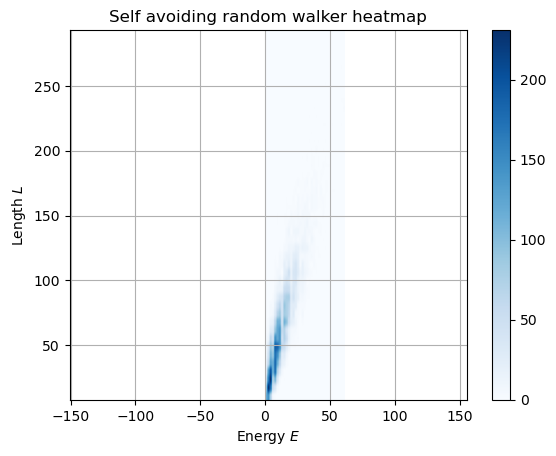

In [398]:
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower',cmap=plt.cm.Blues)

plt.xlabel("Energy $E$")
plt.ylabel("Length $L$")
plt.axis('equal')
plt.xlim(0,5)
plt.title("Self avoiding random walker heatmap")

plt.colorbar()
plt.grid()
plt.show()

In [ ]:

plt.title('Diffrence between simulated and theoretical ground energy level $\Delta$\n')

plt.contourf(self_avoiding_ensemble_E, self_avoiding_ensemble_L, z,cmap ="bone")
plt.set_ylabel(ylabel=r'$\gamma$ in [eV]')#, fontsize = 14.)